<a href="https://colab.research.google.com/github/calderonf/CursoMachineLearning/blob/master/Codigo/PCA_ejemplos_fisher_2D_y_3D_y_kernelPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles, make_moons, make_classification

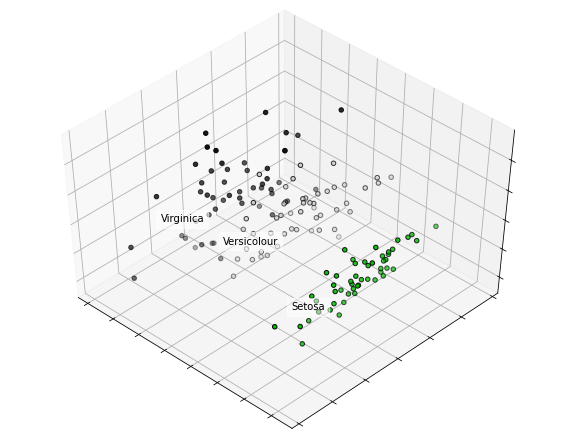

Pesos de PCA: [0.72962445 0.22850762 0.03668922]


In [33]:
np.random.seed(0)
centers = [[1, 1], [-1, -1], [1, -1]]
#Cargar el dataset de Iris
iris = datasets.load_iris()
Xo = iris.data
y = iris.target
# no vamos a dividir en test y training ya que solo quiero demostrar el uso de PCA en el conjunto
# se escalizan los datos.
scaler = StandardScaler()# Ejercicio, no use la escalización de los datos a ver que tal funciona, Cambia?
scaler.fit(Xo)
X = scaler.transform(Xo)

#Preparar figura 3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#1. Usando parametros por defecto y 3 dimensiones de salida:
# sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
#pca = decomposition.PCA(n_components=3)

#2. Usando parametros por defecto y 3 dimensiones de salida y blanqueando:
# sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=True, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
#pca = decomposition.PCA(n_components=3,whiten=True)

#3. Usando parametros por defecto y 3 dimensiones de salida y blanqueando:
# sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=True, svd_solver='arpack', tol=0.0, iterated_power='auto', random_state=None)
pca = decomposition.PCA(n_components=3,whiten=True,svd_solver='arpack')


#The optional parameter whiten=True makes it possible to project the data onto the singular space while scaling each component to unit variance.
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results

y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()
print("Pesos de PCA:",pca.explained_variance_ratio_)

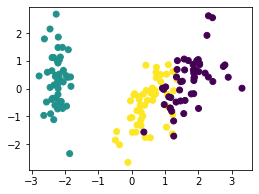

Pesos de PCA: [0.72962445 0.22850762]


In [34]:
np.random.seed(0)
#Cargar el dataset de Iris
iris = datasets.load_iris()
Xo = iris.data
y = iris.target
# no vamos a dividir en test y training ya que solo quiero demostrar el uso de PCA en el conjunto
# se escalizan los datos.
scaler = StandardScaler()# Ejercicio, no use la escalización de los datos a ver que tal funciona, Cambia?
scaler.fit(Xo)
X = scaler.transform(Xo)

#Preparar figura 2D
fig = plt.figure(2, figsize=(4, 3))
n=2

# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#1. Usando parametros por defecto y n dimensiones de salida:
# sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
pca = decomposition.PCA(n_components=n)

#2. Usando parametros por defecto y n dimensiones de salida y blanqueando:
# sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=True, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
#pca = decomposition.PCA(n_components=n,whiten=True)

#3. Usando parametros por defecto y n dimensiones de salida y blanqueando y con otro solver mas rápido:
# sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=True, svd_solver='arpack', tol=0.0, iterated_power='auto', random_state=None)
#pca = decomposition.PCA(n_components=n,whiten=True,svd_solver='arpack')


#The optional parameter whiten=True makes it possible to project the data onto the singular space while scaling each component to unit variance.
pca.fit(X)
X = pca.transform(X)

# Reorder the labels to have colors matching the cluster results

y = np.choose(y, [1, 2, 0]).astype(np.float)
plt.scatter(X[:, 0], X[:, 1], c=y,)

plt.show()
print("Pesos de PCA:",pca.explained_variance_ratio_)

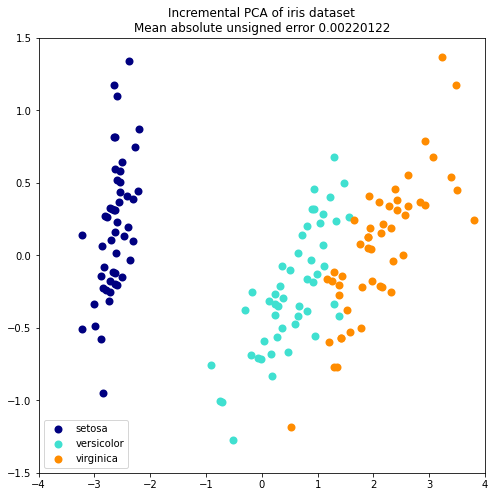

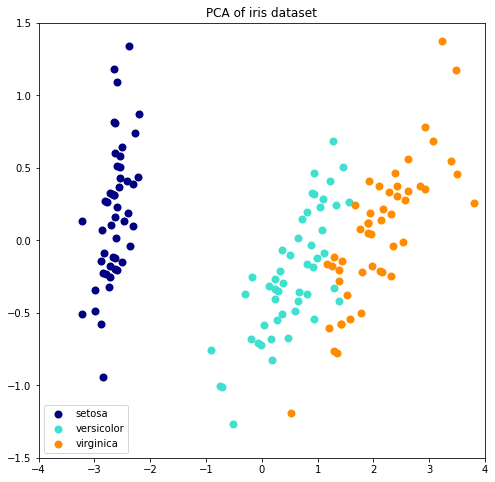

In [35]:
# Comparación con IncrementalPCA
# Authors: Kyle Kastner
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
y = iris.target

n= 2
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html
ipca = IncrementalPCA(n_components=n, batch_size=10)# note el batch size este cambielo de acuerdo a la RAM disponible en su sistema
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n)
X_pca = pca.fit_transform(X)

colors = ['navy', 'turquoise', 'darkorange']

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()#OJO con esta linea! miren que idealmente deberian ser iguales, pero no lo son. 
        plt.title(title + " of iris dataset\nMean absolute unsigned error "
                  "%.8f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

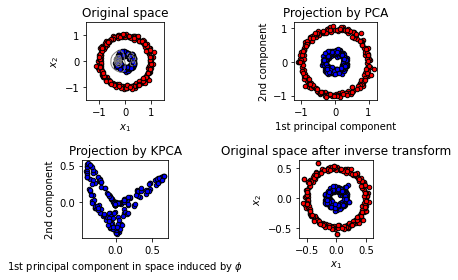

In [69]:
# Authors: Mathieu Blondel
#          Andreas Mueller
# License: BSD 3 clause
"""
 _  _  ____  ____  _  _  ____  __      ____   ___    __   
( )/ )( ___)(  _ \( \( )( ___)(  )    (  _ \ / __)  /__\  
 )  (  )__)  )   / )  (  )__)  )(__    )___/( (__  /(__)\ 
(_)\_)(____)(_)\_)(_)\_)(____)(____)  (__)   \___)(__)(__)
"""

np.random.seed(0)
dataset=1

if dataset==1:
  X, y = make_circles(n_samples=400, factor=.3, noise=.05, random_state=1)
else:
  if dataset==2:
    X, y = make_moons(n_samples=400,  noise=0.075, random_state=0)
  else:
    X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)


# Kernel. Default:
# n_components=None, *, kernel='linear', gamma=None, degree=3, coef0=1, kernel_params=None, alpha=1.0, 
# fit_inverse_transform=False, eigen_solver='auto', tol=0, max_iter=None, remove_zero_eig=False, 
# random_state=None, copy_X=True, n_jobs=None


# kernel "linear" | "poly" | "rbf" | "sigmoid" | "cosine" | "precomputed"
# fit_inverse_transform, default=False
# Learn the inverse transform for non-precomputed kernels. (i.e. learn to find the pre-image of a point)
kpca = KernelPCA(kernel="poly", degree=2,coef0=0,fit_inverse_transform=True)# probar este con dataset 1  2 y 3
#kpca = KernelPCA(kernel="poly", degree=3,coef0=0,fit_inverse_transform=True)# probar este con dataset 1  2 y 3 
#kpca = KernelPCA(kernel="rbf",fit_inverse_transform=True)# dejar gamma por defecto probar este con dataset 1  2 y 3 
#kpca = KernelPCA(kernel="rbf", gamma=1,fit_inverse_transform=True)# probar este con dataset 1  2 y 3 
#kpca = KernelPCA(kernel="rbf", gamma=10,fit_inverse_transform=True)# probar este con dataset 1  2 y 3 
#kpca = KernelPCA(kernel="rbf", gamma=100,fit_inverse_transform=True)# probar este con dataset 1  2 y 3 

#Aplicar transformacion a los datos
X_kpca = kpca.fit_transform(X)
#retornar a los datos originales!
X_back = kpca.inverse_transform(X_kpca)
# PCA con parámetros por defecto para comparar:
pca = PCA()
X_pca = pca.fit_transform(X)

########################################
########GRAFICAR LOS RESULTADOS#########
########################################

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.tight_layout()
plt.show()